In [838]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import os

In [839]:
df = pd.read_csv("../data/development_indicators.csv")


In [840]:
df.shape

(11072, 20)

In [841]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11072 entries, 0 to 11071
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    11069 non-null  object
 1   Series Code    11067 non-null  object
 2   Country Name   11067 non-null  object
 3   Country Code   11067 non-null  object
 4   2000 [YR2000]  11067 non-null  object
 5   2001 [YR2001]  11067 non-null  object
 6   2002 [YR2002]  11067 non-null  object
 7   2003 [YR2003]  11067 non-null  object
 8   2004 [YR2004]  11067 non-null  object
 9   2005 [YR2005]  11067 non-null  object
 10  2006 [YR2006]  11067 non-null  object
 11  2007 [YR2007]  11067 non-null  object
 12  2008 [YR2008]  11067 non-null  object
 13  2009 [YR2009]  11067 non-null  object
 14  2010 [YR2010]  11067 non-null  object
 15  2011 [YR2011]  11067 non-null  object
 16  2012 [YR2012]  11067 non-null  object
 17  2013 [YR2013]  11067 non-null  object
 18  2014 [YR2014]  11067 non-n

In [842]:
df.describe()

Series Name  Series Code Country Name Country Code  \
count               11069        11067        11067        11067   
unique                 53           51          217          217   
top     Population, total  SP.POP.TOTL  Afghanistan          AFG   
freq                  217          217           51           51   

       2000 [YR2000] 2001 [YR2001] 2002 [YR2002] 2003 [YR2003] 2004 [YR2004]  \
count          11067         11067         11067         11067         11067   
unique          7302          7274          7362          7412          7491   
top               ..            ..            ..            ..            ..   
freq            3185          3298          3183          3010          2883   

       2005 [YR2005] 2006 [YR2006] 2007 [YR2007] 2008 [YR2008] 2009 [YR2009]  \
count          11067         11067         11067         11067         11067   
unique          7572          7617          7684          7700          7774   
top               ..            ..            ..            ..            ..   
freq            2775          2719          2663          2629          2561   

       2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
count          11067         11067         11067         11067         11067   
unique          7819          7867          7862          7880          7944   
top               ..            ..            ..            ..            ..   
freq            2487          2452          2434          2448          2353   

       2015 [YR2015]  
count          11067  
unique          7455  
top               ..  
freq            2634

In [843]:
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'],
      dtype='object')

In [844]:
#Check for missing values
df.isnull().sum()

Series Name      3
Series Code      5
Country Name     5
Country Code     5
2000 [YR2000]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
2006 [YR2006]    5
2007 [YR2007]    5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
dtype: int64

In [845]:
#Show rows with complete missing values in all columns
df[df.isnull().all(axis=1)]


Series Name Series Code Country Name Country Code 2000 [YR2000]  \
11067         NaN         NaN          NaN          NaN           NaN   
11068         NaN         NaN          NaN          NaN           NaN   
11069         NaN         NaN          NaN          NaN           NaN   

      2001 [YR2001] 2002 [YR2002] 2003 [YR2003] 2004 [YR2004] 2005 [YR2005]  \
11067           NaN           NaN           NaN           NaN           NaN   
11068           NaN           NaN           NaN           NaN           NaN   
11069           NaN           NaN           NaN           NaN           NaN   

      2006 [YR2006] 2007 [YR2007] 2008 [YR2008] 2009 [YR2009] 2010 [YR2010]  \
11067           NaN           NaN           NaN           NaN           NaN   
11068           NaN           NaN           NaN           NaN           NaN   
11069           NaN           NaN           NaN           NaN           NaN   

      2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014] 2015 [YR2015]  
11067           NaN           NaN           NaN           NaN           NaN  
11068           NaN           NaN           NaN           NaN           NaN  
11069           NaN           NaN           NaN           NaN           NaN

In [846]:
#Drop rows with missing values in all columns
df = df.dropna(how='all')
df.shape

(11069, 20)

In [847]:
#show rows with missing values in Country Name and Country Code
df[df[['Country Name', 'Country Code']].isnull().any(axis=1)]

Series Name Series Code  \
11070  Data from database: World Development Indicators         NaN   
11071                          Last Updated: 05/30/2024         NaN   

      Country Name Country Code 2000 [YR2000] 2001 [YR2001] 2002 [YR2002]  \
11070          NaN          NaN           NaN           NaN           NaN   
11071          NaN          NaN           NaN           NaN           NaN   

      2003 [YR2003] 2004 [YR2004] 2005 [YR2005] 2006 [YR2006] 2007 [YR2007]  \
11070           NaN           NaN           NaN           NaN           NaN   
11071           NaN           NaN           NaN           NaN           NaN   

      2008 [YR2008] 2009 [YR2009] 2010 [YR2010] 2011 [YR2011] 2012 [YR2012]  \
11070           NaN           NaN           NaN           NaN           NaN   
11071           NaN           NaN           NaN           NaN           NaN   

      2013 [YR2013] 2014 [YR2014] 2015 [YR2015]  
11070           NaN           NaN           NaN  
11071           NaN           NaN           NaN

In [848]:
#Drop rows with missing values in Country Name and Country Code
df = df.dropna(subset=['Country Name', 'Country Code'])
df.shape

(11067, 20)

In [849]:
df[df.loc[:, '2000 [YR2000]':'2015 [YR2015]'].isnull().all(axis=1)]




Empty DataFrame
Columns: [Series Name, Series Code, Country Name, Country Code, 2000 [YR2000], 2001 [YR2001], 2002 [YR2002], 2003 [YR2003], 2004 [YR2004], 2005 [YR2005], 2006 [YR2006], 2007 [YR2007], 2008 [YR2008], 2009 [YR2009], 2010 [YR2010], 2011 [YR2011], 2012 [YR2012], 2013 [YR2013], 2014 [YR2014], 2015 [YR2015]]
Index: []

In [850]:
# Define the columns to check for missing values
columns_to_check = [f'{year} [YR{year}]' for year in range(2000, 2016)]

# Check if the columns exist in the DataFrame
columns_to_check = [col for col in columns_to_check if col in df.columns]

# If any of the columns exist, drop rows with all missing values in those columns
if columns_to_check:
    df = df.dropna(subset=columns_to_check, how='all')

df.shape

(11067, 20)

In [851]:
df.isnull().sum()

Series Name      0
Series Code      0
Country Name     0
Country Code     0
2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
dtype: int64

In [852]:
#Rename columns 2000 [YR2000] to 2015 [YR2015] to Year 2000 to Year 2015 without duplicates
df.columns = df.columns.str.replace(' [YR', '').str.replace(']', '')
df.columns = df.columns.str.replace('(\d{4})\d{4}', r'\1', regex=True)
df.columns


Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [853]:
df.head(1)

Series Name  Series Code Country Name Country Code      2000  \
0  Population, total  SP.POP.TOTL  Afghanistan          AFG  19542982   

       2001      2002      2003      2004      2005      2006      2007  \
0  19688632  21000256  22645130  23553551  24411191  25442944  25903301   

       2008      2009      2010      2011      2012      2013      2014  \
0  26427199  27385307  28189672  29249157  30466479  31541209  32716210   

       2015  
0  33753499

In [854]:
#Check for duplicates
df.duplicated().sum()

0

In [855]:
#Check rows where Series Name and Series Code are missing
df[df[['Series Name', 'Series Code']].isnull().any(axis=1)]





Empty DataFrame
Columns: [Series Name, Series Code, Country Name, Country Code, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Index: []

In [856]:
#Drop Series Code column
df = df.drop('Series Code', axis=1)
df.head(2)


Series Name Country Name Country Code      2000      2001      2002  \
0  Population, total  Afghanistan          AFG  19542982  19688632  21000256   
1  Population, total      Albania          ALB   3089027   3060173   3051010   

       2003      2004      2005      2006      2007      2008      2009  \
0  22645130  23553551  24411191  25442944  25903301  26427199  27385307   
1   3039616   3026939   3011487   2992547   2970017   2947314   2927519   

       2010      2011      2012      2013      2014      2015  
0  28189672  29249157  30466479  31541209  32716210  33753499  
1   2913021   2905195   2900401   2895092   2889104   2880703

In [857]:
#check all rows with country name Afghanistan
df[df['Country Name'] == 'Afghanistan']


Series Name Country Name  \
0                                      Population, total  Afghanistan   
217                         Population growth (annual %)  Afghanistan   
434                                Surface area (sq. km)  Afghanistan   
651    Poverty headcount ratio at national poverty li...  Afghanistan   
868                      GNI, Atlas method (current US$)  Afghanistan   
1085          GNI per capita, Atlas method (current US$)  Afghanistan   
1302                  GNI, PPP (current international $)  Afghanistan   
1519       GNI per capita, PPP (current international $)  Afghanistan   
1736                     Income share held by lowest 20%  Afghanistan   
1953             Life expectancy at birth, total (years)  Afghanistan   
2170            Fertility rate, total (births per woman)  Afghanistan   
2387   Adolescent fertility rate (births per 1,000 wo...  Afghanistan   
2604   Contraceptive prevalence, any method (% of mar...  Afghanistan   
2821   Births attended by skilled health staff (% of ...  Afghanistan   
3038     Mortality rate, under-5 (per 1,000 live births)  Afghanistan   
3255   Prevalence of underweight, weight for age (% o...  Afghanistan   
3472   Immunization, measles (% of children ages 12-2...  Afghanistan   
3689   Primary completion rate, total (% of relevant ...  Afghanistan   
3906              School enrollment, secondary (% gross)  Afghanistan   
4123   School enrollment, primary and secondary (gros...  Afghanistan   
4340   Prevalence of HIV, total (% of population ages...  Afghanistan   
4557                                Forest area (sq. km)  Afghanistan   
4774   Water productivity, total (constant 2015 US$ G...  Afghanistan   
4991        Energy use (kg of oil equivalent per capita)  Afghanistan   
5208              CO2 emissions (metric tons per capita)  Afghanistan   
5425         Electric power consumption (kWh per capita)  Afghanistan   
5642                                   GDP (current US$)  Afghanistan   
5859                               GDP growth (annual %)  Afghanistan   
6076                  Inflation, GDP deflator (annual %)  Afghanistan   
6293   Agriculture, forestry, and fishing, value adde...  Afghanistan   
6510   Industry (including construction), value added...  Afghanistan   
6727            Exports of goods and services (% of GDP)  Afghanistan   
6944            Imports of goods and services (% of GDP)  Afghanistan   
7161                  Gross capital formation (% of GDP)  Afghanistan   
7378                Revenue, excluding grants (% of GDP)  Afghanistan   
7595   Start-up procedures to register a business (nu...  Afghanistan   
7812   Market capitalization of listed domestic compa...  Afghanistan   
8029                     Military expenditure (% of GDP)  Afghanistan   
8246      Mobile cellular subscriptions (per 100 people)  Afghanistan   
8463   High-technology exports (% of manufactured exp...  Afghanistan   
8680                        Merchandise trade (% of GDP)  Afghanistan   
8897        Net barter terms of trade index (2015 = 100)  Afghanistan   
9114      External debt stocks, total (DOD, current US$)  Afghanistan   
9331                       Total debt service (% of GNI)  Afghanistan   
9548                                       Net migration  Afghanistan   
9765            Personal remittances, paid (current US$)  Afghanistan   
9982   Foreign direct investment, net inflows (BoP, c...  Afghanistan   
10199          Net ODA received per capita (current US$)  Afghanistan   
10416                       GDP per capita (current US$)  Afghanistan   
10633  Foreign direct investment, net (BoP, current US$)  Afghanistan   
10850              Inflation, consumer prices (annual %)  Afghanistan   

      Country Code                2000                2001  \
0              AFG            19542982            19688632   
217            AFG     1.4438030241194   0.742516834396313   
434            AFG              652860              652860   


In [858]:
#Check how many unique countries are in the dataset
df['Country Name'].nunique()


217

In [859]:
df.dtypes

Series Name     object
Country Name    object
Country Code    object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
dtype: object

In [860]:
#Check rows with non-numeric values in columns 2000 to 2015
df[df.loc[:, '2000':'2015'].applymap(lambda x: not str(x).replace('.', '').replace('-', '').isnumeric()).any(axis=1)]


/var/folders/8l/8rdghy394hsfcdgcvnznlcb40000gn/T/ipykernel_22053/683716231.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Series Name  \
538                                Surface area (sq. km)   
611                                Surface area (sq. km)   
616                                Surface area (sq. km)   
651    Poverty headcount ratio at national poverty li...   
652    Poverty headcount ratio at national poverty li...   
...                                                  ...   
11058              Inflation, consumer prices (annual %)   
11060              Inflation, consumer prices (annual %)   
11062              Inflation, consumer prices (annual %)   
11064              Inflation, consumer prices (annual %)   
11066              Inflation, consumer prices (annual %)   

                   Country Name Country Code              2000  \
538                      Kosovo          XKX                ..   
611                 South Sudan          SSD                ..   
616    St. Martin (French part)          MAF                ..   
651                 Afghanistan          AFG                ..   
652                     Albania          ALB                ..   
...                         ...          ...               ...   
11058                Uzbekistan          UZB                ..   
11060             Venezuela, RB          VEN                ..   
11062     Virgin Islands (U.S.)          VIR                ..   
11064               Yemen, Rep.          YEM  4.58999999999981   
11066                  Zimbabwe          ZWE                ..   

                   2001              2002              2003              2004  \
538                  ..                ..                ..                ..   
611                  ..                ..                ..                ..   
616                  ..                ..                ..                ..   
651                  ..                ..                ..                ..   
652                  ..              25.4                ..                ..   
...                 ...               ...               ...               ...   
11058                ..                ..                ..                ..   
11060                ..                ..                ..                ..   
11062                ..                ..                ..                ..   
11064  11.9115912929855  12.2385339389711  10.8323607023242  12.5150951495207   
11066                ..                ..                ..                ..   

                   2005              2006             2007              2008  \
538                  ..                ..               ..                ..   
611                  ..                ..               ..                ..   
616                  ..                ..               ..                ..   
651                  ..                ..             33.7                ..   
652                18.5                ..               ..                ..   
...                 ...               ...              ...               ...   
11058                ..                ..               ..                ..   
11060                ..                ..               ..                ..   
11062                ..                ..               ..                ..   
11064  11.8112639374949  10.8447986914257  7.9051177898873  18.9762574318077   
11066                ..                ..               ..                ..   

                   2009              2010              2011              2012  \
538                  ..                ..                ..                ..   
611                  ..                ..                ..            646883   
616                  ..                ..                50                50   
651                  ..                ..              38.3                ..   
652                  ..                ..                ..                ..   
...                 ...               ...               ...               ...   
11058                ..       

In [861]:
# Convert column names to strings
df.columns = df.columns.astype(str)

# Convert each column from '2000' to '2015' to numeric, coercing non-numeric values to NaNs
for year in range(2000, 2016):
    df[str(year)] = pd.to_numeric(df[str(year)], errors='coerce')

# Fill NaNs with 0 and convert columns to integers
for year in range(2000, 2016):
    df[str(year)] = df[str(year)].fillna(0).astype(int)

# Display the data types of the DataFrame
df.dtypes

Series Name     object
Country Name    object
Country Code    object
2000             int64
2001             int64
2002             int64
2003             int64
2004             int64
2005             int64
2006             int64
2007             int64
2008             int64
2009             int64
2010             int64
2011             int64
2012             int64
2013             int64
2014             int64
2015             int64
dtype: object

In [862]:
#Check top 10 countries with highest Population total (value under Series Name) in 2015
df[df['Series Name'] == 'Population, total'].nlargest(10, '2015')['Country Name']



41                  China
88                  India
206         United States
89              Indonesia
148              Pakistan
26                 Brazil
144               Nigeria
15             Bangladesh
160    Russian Federation
97                  Japan
Name: Country Name, dtype: object

In [863]:
#Check outliers in the data
df.describe()


2000          2001          2002          2003          2004  \
count  1.106700e+04  1.106700e+04  1.106700e+04  1.106700e+04  1.106700e+04   
mean   1.067359e+10  1.084769e+10  1.119185e+10  1.213018e+10  1.354777e+10   
std    2.011943e+11  2.061835e+11  2.117567e+11  2.251349e+11  2.453501e+11   
min   -1.627550e+11 -3.735700e+10 -4.678957e+10 -4.944485e+10 -6.014467e+10   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.000000e+01  8.000000e+00  1.000000e+01  1.100000e+01  1.300000e+01   
75%    1.060000e+02  1.080000e+02  1.125000e+02  1.140000e+02  1.220000e+02   
max    1.038367e+13  1.074607e+13  1.105222e+13  1.153742e+13  1.274471e+13   

               2005          2006          2007          2008          2009  \
count  1.106700e+04  1.106700e+04  1.106700e+04  1.106700e+04  1.106700e+04   
mean   1.478080e+10  1.620549e+10  1.782561e+10  1.922771e+10  1.899451e+10   
std    2.632439e+11  2.804343e+11  2.966555e+11  3.098141e+11  3.094654e+11   
min   -9.274295e+10 -1.001498e+11 -1.390945e+11 -1.147924e+11 -8.716707e+10   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.400000e+01  1.500000e+01  1.600000e+01  1.700000e+01  1.600000e+01   
75%    1.230000e+02  1.300000e+02  1.355000e+02  1.430000e+02  1.370000e+02   
max    1.365122e+13  1.427810e+13  1.461843e+13  1.493641e+13  1.469521e+13   

               2010          2011          2012          2013          2014  \
count  1.106700e+04  1.106700e+04  1.106700e+04  1.106700e+04  1.106700e+04   
mean   2.045415e+10  2.211918e+10  2.314664e+10  2.417745e+10  2.494449e+10   
std    3.292953e+11  3.517368e+11  3.725878e+11  3.887237e+11  4.071253e+11   
min   -1.857498e+11 -2.316516e+11 -1.762505e+11 -2.179576e+11 -1.728058e+11   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.700000e+01  1.800000e+01  1.800000e+01  1.700000e+01  1.900000e+01   
75%    1.480000e+02  1.610000e+02  1.600000e+02  1.610000e+02  1.645000e+02   
max    1.521513e+13  1.584998e+13  1.667560e+13  1.718833e+13  1.804309e+13   

               2015  
count  1.106700e+04  
mean   2.455368e+10  
std    4.162656e+11  
min   -2.093630e+11  
25%    0.000000e+00  
50%    1.300000e+01  
75%    1.050000e+02  
max    1.866091e+13

In [864]:
# Define the column names for the years 2000 to 2015
year_columns = [str(year) for year in range(2000, 2016)]

# Calculate the total for each group across the years 2000 to 2015
df['Total'] = df.groupby(['Series Name', 'Country Name', 'Country Code'])[year_columns].transform('sum').sum(axis=1)

df

Series Name           Country Name  \
0                          Population, total            Afghanistan   
1                          Population, total                Albania   
2                          Population, total                Algeria   
3                          Population, total         American Samoa   
4                          Population, total                Andorra   
...                                      ...                    ...   
11062  Inflation, consumer prices (annual %)  Virgin Islands (U.S.)   
11063  Inflation, consumer prices (annual %)     West Bank and Gaza   
11064  Inflation, consumer prices (annual %)            Yemen, Rep.   
11065  Inflation, consumer prices (annual %)                 Zambia   
11066  Inflation, consumer prices (annual %)               Zimbabwe   

      Country Code      2000      2001      2002      2003      2004  \
0              AFG  19542982  19688632  21000256  22645130  23553551   
1              ALB   3089027   3060173   3051010   3039616   3026939   
2              DZA  30774621  31200985  31624696  32055883  32510186   
3              ASM     58230     58324     58177     57941     57626   
4              AND     66097     67820     70849     73907     76933   
...            ...       ...       ...       ...       ...       ...   
11062          VIR         0         0         0         0         0   
11063          PSE         2         1         5         4         3   
11064          YEM         4        11        12        10        12   
11065          ZMB        26        21        22        21        17   
11066          ZWE         0         0         0         0         0   

           2005      2006      2007      2008      2009      2010      2011  \
0      24411191  25442944  25903301  26427199  27385307  28189672  29249157   
1       3011487   2992547   2970017   2947314   2927519   2913021   2905195   
2      32956690  33435080  33983827  34569592  35196037  35856344  36543541   
3         57254     56837     56383     55891     55366     54849     54310   
4         79826     80221     78168     76055     73852     71519     70567   
...         ...       ...       ...       ...       ...       ...       ...   
11062         0         0         0         0         0         0         0   
11063         4         3         1         9         2         3         2   
11064        11        10         7        18         5        11        19   
11065        18         9        10        12        13         8         6   
11066         0         0         0         0         0         3         3   

           2012      2013      2014      2015      Total  
0      30466479  31541209  32716210  33753499  421916719  
1       2900401   2895092   2889104   2880703   47499165  
2      37260563  38000626  38760168  39543154  554271993  
3         53691     52995     52217     51368     891459  
4         71013     71367     71621     71746    1171561  
...         ...       ...       ...       ...        ...  
11062         0         0         0         0          0  
11063         2         1         1         1         44  
11064         9        10         8         0        157  
11065         6         6         7        10        212  
11066         3         1         0        -2          8  

[11067 rows x 20 columns]

In [865]:
# Check the top 10 groups with the highest total across the years 2000 to 2015
df.groupby('Series Name')['Total'].sum().nlargest(10)


Series Name
GNI, PPP (current international $)                           1247691265741323
GDP (current US$)                                             910862362800750
GNI, Atlas method (current US$)                               898086866321838
External debt stocks, total (DOD, current US$)                 63855163755219
Foreign direct investment, net inflows (BoP, current US$)      28797259707236
Personal remittances, paid (current US$)                        4224393862698
Population, total                                                107880844612
Surface area (sq. km)                                              2146699278
Forest area (sq. km)                                                657548877
GNI per capita, PPP (current international $)                        48058600
Name: Total, dtype: int64

In [866]:
# Check the top 10 countries with the highest total across the years 2000 to 2015
df.groupby('Country Name')['Total'].sum().nlargest(10)


Country Name
United States         687872774889214
China                 326344128694579
Japan                 236610925927173
Germany               149810511691859
United Kingdom        115795884883600
India                 113189478160318
France                112092255581530
Italy                  91809889952505
Brazil                 89055065231174
Russian Federation     81488537909065
Name: Total, dtype: int64

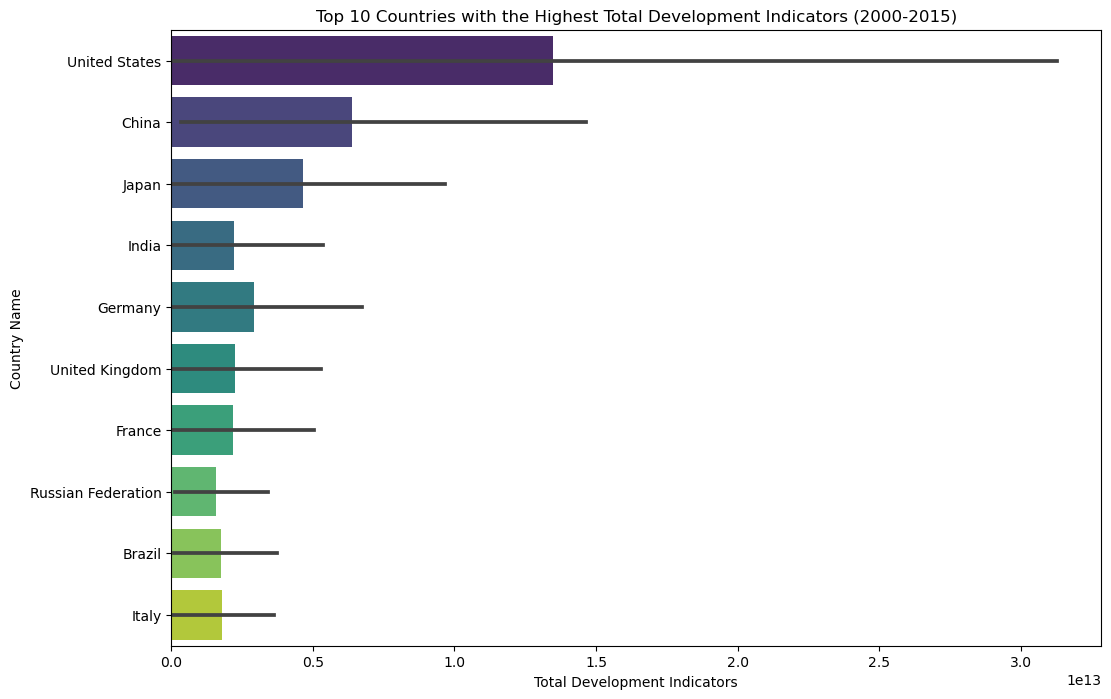

In [867]:
# Plot the top 10 countries with the highest total across the years 2000 to 2015
top_countries = df.groupby('Country Name')['Total'].sum().nlargest(10).index
df_top_countries = df[df['Country Name'].isin(top_countries)]
df_top_countries = df_top_countries.sort_values('Total', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Country Name', data=df_top_countries, palette='viridis')
plt.title('Top 10 Countries with the Highest Total Development Indicators (2000-2015)')
plt.xlabel('Total Development Indicators')
plt.ylabel('Country Name')
plt.show()


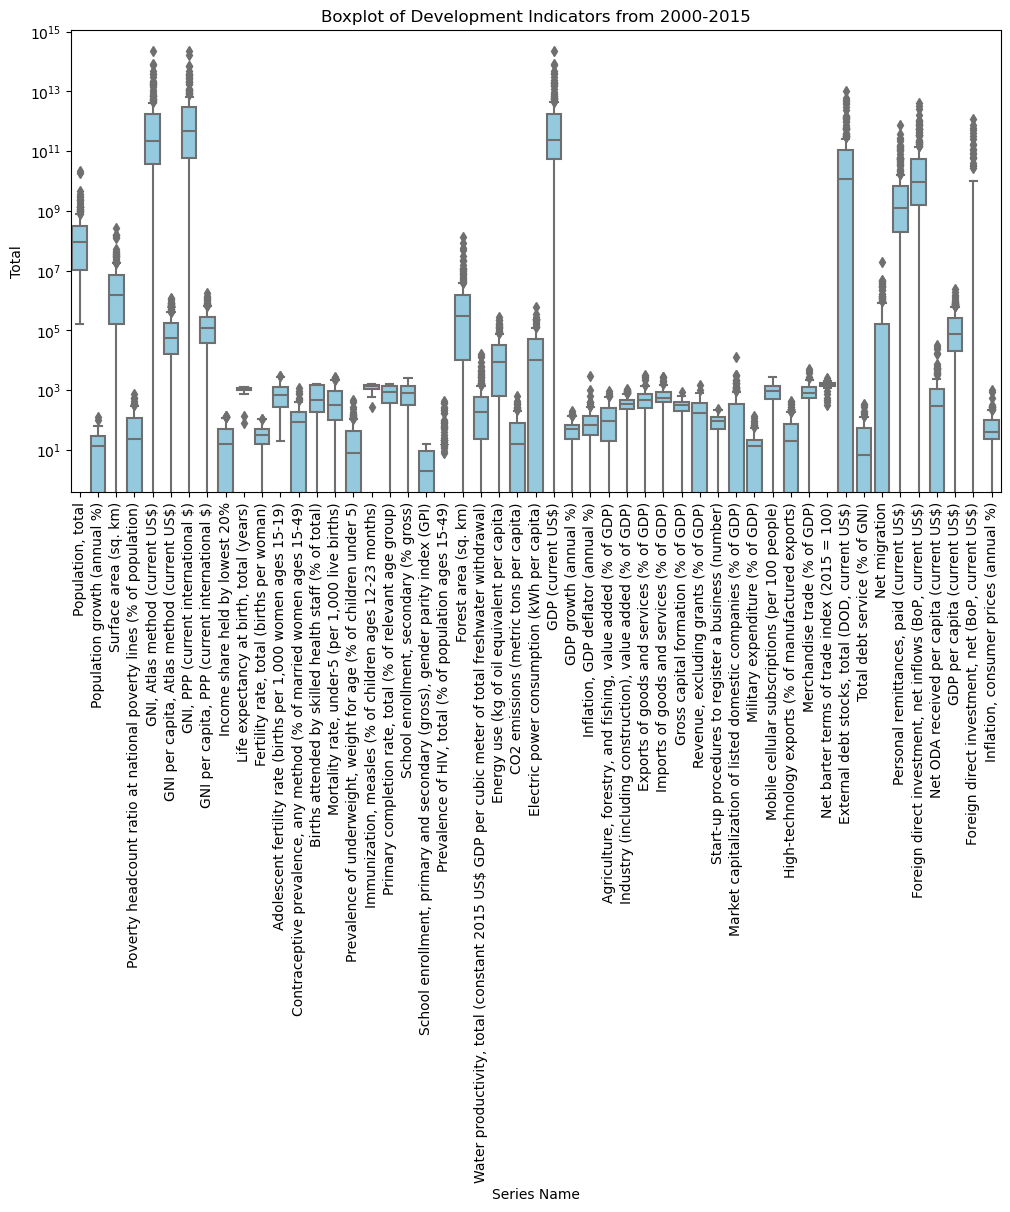

In [868]:
#Create a boxplot of the data using Unique values under Series Name and Total


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Series Name', y='Total', color='skyblue')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Boxplot of Development Indicators from 2000-2015')
plt.ylabel('Total')
plt.show()


In [869]:
#Remove rows with Series Name containing 'current US$'
df_filtered = df[df['Series Name'].str.contains('current US$')]
df_filtered.shape
df_filtered.head()
df.head()

Series Name    Country Name Country Code      2000      2001  \
0  Population, total     Afghanistan          AFG  19542982  19688632   
1  Population, total         Albania          ALB   3089027   3060173   
2  Population, total         Algeria          DZA  30774621  31200985   
3  Population, total  American Samoa          ASM     58230     58324   
4  Population, total         Andorra          AND     66097     67820   

       2002      2003      2004      2005      2006      2007      2008  \
0  21000256  22645130  23553551  24411191  25442944  25903301  26427199   
1   3051010   3039616   3026939   3011487   2992547   2970017   2947314   
2  31624696  32055883  32510186  32956690  33435080  33983827  34569592   
3     58177     57941     57626     57254     56837     56383     55891   
4     70849     73907     76933     79826     80221     78168     76055   

       2009      2010      2011      2012      2013      2014      2015  \
0  27385307  28189672  29249157  30466479  31541209  32716210  33753499   
1   2927519   2913021   2905195   2900401   2895092   2889104   2880703   
2  35196037  35856344  36543541  37260563  38000626  38760168  39543154   
3     55366     54849     54310     53691     52995     52217     51368   
4     73852     71519     70567     71013     71367     71621     71746   

       Total  
0  421916719  
1   47499165  
2  554271993  
3     891459  
4    1171561

In [870]:
df_filtered.dtypes

Series Name     object
Country Name    object
Country Code    object
2000             int64
2001             int64
2002             int64
2003             int64
2004             int64
2005             int64
2006             int64
2007             int64
2008             int64
2009             int64
2010             int64
2011             int64
2012             int64
2013             int64
2014             int64
2015             int64
Total            int64
dtype: object

In [871]:
# Ensure 'Series Name' is a string
df['Series Name'] = df['Series Name'].astype(str)

# Define a list of terms to filter out
unwanted_terms = ['current US$']

# Filter out rows where 'Series Name' contains any of the unwanted terms
filtered_df = df[~df['Series Name'].apply(lambda x: any(term in x for term in unwanted_terms))]
filtered_df.shape
filtered_df.head()

Series Name    Country Name Country Code      2000      2001  \
0  Population, total     Afghanistan          AFG  19542982  19688632   
1  Population, total         Albania          ALB   3089027   3060173   
2  Population, total         Algeria          DZA  30774621  31200985   
3  Population, total  American Samoa          ASM     58230     58324   
4  Population, total         Andorra          AND     66097     67820   

       2002      2003      2004      2005      2006      2007      2008  \
0  21000256  22645130  23553551  24411191  25442944  25903301  26427199   
1   3051010   3039616   3026939   3011487   2992547   2970017   2947314   
2  31624696  32055883  32510186  32956690  33435080  33983827  34569592   
3     58177     57941     57626     57254     56837     56383     55891   
4     70849     73907     76933     79826     80221     78168     76055   

       2009      2010      2011      2012      2013      2014      2015  \
0  27385307  28189672  29249157  30466479  31541209  32716210  33753499   
1   2927519   2913021   2905195   2900401   2895092   2889104   2880703   
2  35196037  35856344  36543541  37260563  38000626  38760168  39543154   
3     55366     54849     54310     53691     52995     52217     51368   
4     73852     71519     70567     71013     71367     71621     71746   

       Total  
0  421916719  
1   47499165  
2  554271993  
3     891459  
4    1171561

In [872]:
# Filter rows where 'Series Name' is 'Population, total'
population_df = filtered_df[filtered_df['Series Name'] == 'Population, total'].copy()

# Filter rows where 'Series Name' is 'Surface area (sq. km)'
surface_area_df = filtered_df[filtered_df['Series Name'] == 'Surface area (sq. km)'].copy()

# Set 'Country Name' and 'Country Code' as index for easy alignment
population_df.set_index(['Country Name', 'Country Code'], inplace=True)
surface_area_df.set_index(['Country Name', 'Country Code'], inplace=True)

# Normalize 'Population, total' using 'Surface area (sq. km)' for each year
for year in range(2000, 2016):
    population_df[str(year)] = population_df[str(year)].astype(float) / surface_area_df[str(year)].astype(float)

# Reset index
population_df.reset_index(inplace=True)
surface_area_df.reset_index(inplace=True)

# Merge the normalized population data back into the filtered_df
for year in range(2000, 2016):
    filtered_df = filtered_df.merge(population_df[['Country Name', 'Country Code', str(year)]], 
                                    on=['Country Name', 'Country Code'], 
                                    how='left', 
                                    suffixes=('', '_normalized'))

# Replace 'Population, total' with normalized values
for year in range(2000, 2016):
    filtered_df.loc[filtered_df['Series Name'] == 'Population, total', str(year)] = filtered_df[str(year) + '_normalized']

# Drop the temporary normalized columns
for year in range(2000, 2016):
    filtered_df.drop(columns=[str(year) + '_normalized'], inplace=True)



/var/folders/8l/8rdghy394hsfcdgcvnznlcb40000gn/T/ipykernel_22053/1365329145.py:28: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.99344147e+01 1.07444417e+02 1.29210665e+01 2.91150000e+02
 1.40631915e+02 1.31499655e+01 1.70579545e+02 1.33328924e+01
 1.06540787e+02 4.95005556e+02 2.45811410e+00 9.55133705e+01
 9.29399538e+01 2.34159942e+01 1.00203099e+03 8.70223138e+02
 6.15481395e+02 4.80713391e+01 3.35776286e+02 1.04660862e+01
 6.09796358e+01 1.14505556e+03 1.46519700e+01 7.82160243e+00
 8.16119898e+01 2.96870541e+00 2.06527090e+01 1.34026667e+02
 5.78727903e+01 7.36117848e+01 4.33334111e+01 2.26649623e+02
 1.13709926e+02 6.69401293e+01 3.17423734e+01 3.10592171e+00
 1.50219697e+02 6.03417445e+00 6.43234969e+00 7.33868687e+02
 2.03040341e+01 1.32035508e+02 3.43465163e+01 2.88424503e+02
 2.07331427e+01 9.16383041e+00 7.78707045e+01 5.20984618e+01
 7.90290414e+01 1.01062799e+02 3.01486486e+02 1.0251210

In [873]:
filtered_df.head()

Series Name    Country Name Country Code        2000        2001  \
0  Population, total     Afghanistan          AFG   29.934415   30.157510   
1  Population, total         Albania          ALB  107.444417  106.440800   
2  Population, total         Algeria          DZA   12.921067   13.100080   
3  Population, total  American Samoa          ASM  291.150000  291.620000   
4  Population, total         Andorra          AND  140.631915  144.297872   

         2002        2003        2004        2005        2006        2007  \
0   32.166553   34.686043   36.077491   37.391157   38.971516   39.676655   
1  106.122087  105.725774  105.284835  104.747374  104.088591  103.304939   
2   13.277980   13.459019   13.649763   13.837232   14.038090   14.268487   
3  290.885000  289.705000  288.130000  286.270000  284.185000  281.915000   
4  150.742553  157.248936  163.687234  169.842553  170.682979  166.314894   

         2008        2009        2010        2011        2012        2013  \
0   40.479121   41.946676   43.178740   44.801576   46.666175   48.312363   
1  102.515270  101.826748  101.322470  101.050261  100.883513  100.698852   
2   14.514427   14.777447   15.054684   15.343212   15.644261   15.954985   
3  279.455000  276.830000  274.245000  271.550000  268.455000  264.975000   
4  161.819149  157.131915  152.168085  150.142553  151.091489  151.844681   

         2014        2015      Total  
0   50.112137   51.700976  421916719  
1  100.490574  100.198365   47499165  
2   16.273887   16.602626  554271993  
3  261.085000  256.840000     891459  
4  152.385106  152.651064    1171561

In [874]:
#Adjust Total column to reflect the changes made
filtered_df['Total'] = filtered_df.groupby(['Series Name', 'Country Name', 'Country Code'])[year_columns].transform('sum').sum(axis=1)

filtered_df.head()

Series Name    Country Name Country Code        2000        2001  \
0  Population, total     Afghanistan          AFG   29.934415   30.157510   
1  Population, total         Albania          ALB  107.444417  106.440800   
2  Population, total         Algeria          DZA   12.921067   13.100080   
3  Population, total  American Samoa          ASM  291.150000  291.620000   
4  Population, total         Andorra          AND  140.631915  144.297872   

         2002        2003        2004        2005        2006        2007  \
0   32.166553   34.686043   36.077491   37.391157   38.971516   39.676655   
1  106.122087  105.725774  105.284835  104.747374  104.088591  103.304939   
2   13.277980   13.459019   13.649763   13.837232   14.038090   14.268487   
3  290.885000  289.705000  288.130000  286.270000  284.185000  281.915000   
4  150.742553  157.248936  163.687234  169.842553  170.682979  166.314894   

         2008        2009        2010        2011        2012        2013  \
0   40.479121   41.946676   43.178740   44.801576   46.666175   48.312363   
1  102.515270  101.826748  101.322470  101.050261  100.883513  100.698852   
2   14.514427   14.777447   15.054684   15.343212   15.644261   15.954985   
3  279.455000  276.830000  274.245000  271.550000  268.455000  264.975000   
4  161.819149  157.131915  152.168085  150.142553  151.091489  151.844681   

         2014        2015        Total  
0   50.112137   51.700976   646.259105  
1  100.490574  100.198365  1652.144870  
2   16.273887   16.602626   232.717247  
3  261.085000  256.840000  4457.295000  
4  152.385106  152.651064  2492.682979

In [875]:
filtered_df['Series Name'].unique()

array(['Population, total', 'Population growth (annual %)',
       'Surface area (sq. km)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'GNI, PPP (current international $)',
       'GNI per capita, PPP (current international $)',
       'Income share held by lowest 20%',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Births attended by skilled health staff (% of total)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, secondary (% gross)',
       'School enrollment, primary and secondary (gross)

In [876]:
#Rename 'Population, total' to 'Population Density per sq. km'
filtered_df['Series Name'] = filtered_df['Series Name'].replace('Population, total', 'Population Density per sq. km')

filtered_df.head()

Series Name    Country Name Country Code        2000  \
0  Population Density per sq. km     Afghanistan          AFG   29.934415   
1  Population Density per sq. km         Albania          ALB  107.444417   
2  Population Density per sq. km         Algeria          DZA   12.921067   
3  Population Density per sq. km  American Samoa          ASM  291.150000   
4  Population Density per sq. km         Andorra          AND  140.631915   

         2001        2002        2003        2004        2005        2006  \
0   30.157510   32.166553   34.686043   36.077491   37.391157   38.971516   
1  106.440800  106.122087  105.725774  105.284835  104.747374  104.088591   
2   13.100080   13.277980   13.459019   13.649763   13.837232   14.038090   
3  291.620000  290.885000  289.705000  288.130000  286.270000  284.185000   
4  144.297872  150.742553  157.248936  163.687234  169.842553  170.682979   

         2007        2008        2009        2010        2011        2012  \
0   39.676655   40.479121   41.946676   43.178740   44.801576   46.666175   
1  103.304939  102.515270  101.826748  101.322470  101.050261  100.883513   
2   14.268487   14.514427   14.777447   15.054684   15.343212   15.644261   
3  281.915000  279.455000  276.830000  274.245000  271.550000  268.455000   
4  166.314894  161.819149  157.131915  152.168085  150.142553  151.091489   

         2013        2014        2015        Total  
0   48.312363   50.112137   51.700976   646.259105  
1  100.698852  100.490574  100.198365  1652.144870  
2   15.954985   16.273887   16.602626   232.717247  
3  264.975000  261.085000  256.840000  4457.295000  
4  151.844681  152.385106  152.651064  2492.682979

In [877]:
filtered_df.columns

Index(['Series Name', 'Country Name', 'Country Code', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', 'Total'],
      dtype='object')

In [878]:
filtered_df.shape

(9114, 20)

In [879]:
#Groupby 'Series Name', 'Country Name', 'Country Code' to check the lowest total across the years 2000 to 2015
filtered_df.groupby(['Series Name', 'Country Name', 'Country Code'])['Total'].sum().nsmallest(10)


Series Name    Country Name          Country Code
Net migration  Pakistan              PAK            -12428793.0
               Bangladesh            BGD             -8956345.0
               India                 IND             -6480399.0
               China                 CHN             -5730497.0
               Syrian Arab Republic  SYR             -4695217.0
               Nepal                 NPL             -4157959.0
               Mexico                MEX             -3552475.0
               Philippines           PHL             -2864989.0
               Peru                  PER             -2491851.0
               Myanmar               MMR             -2112554.0
Name: Total, dtype: float64

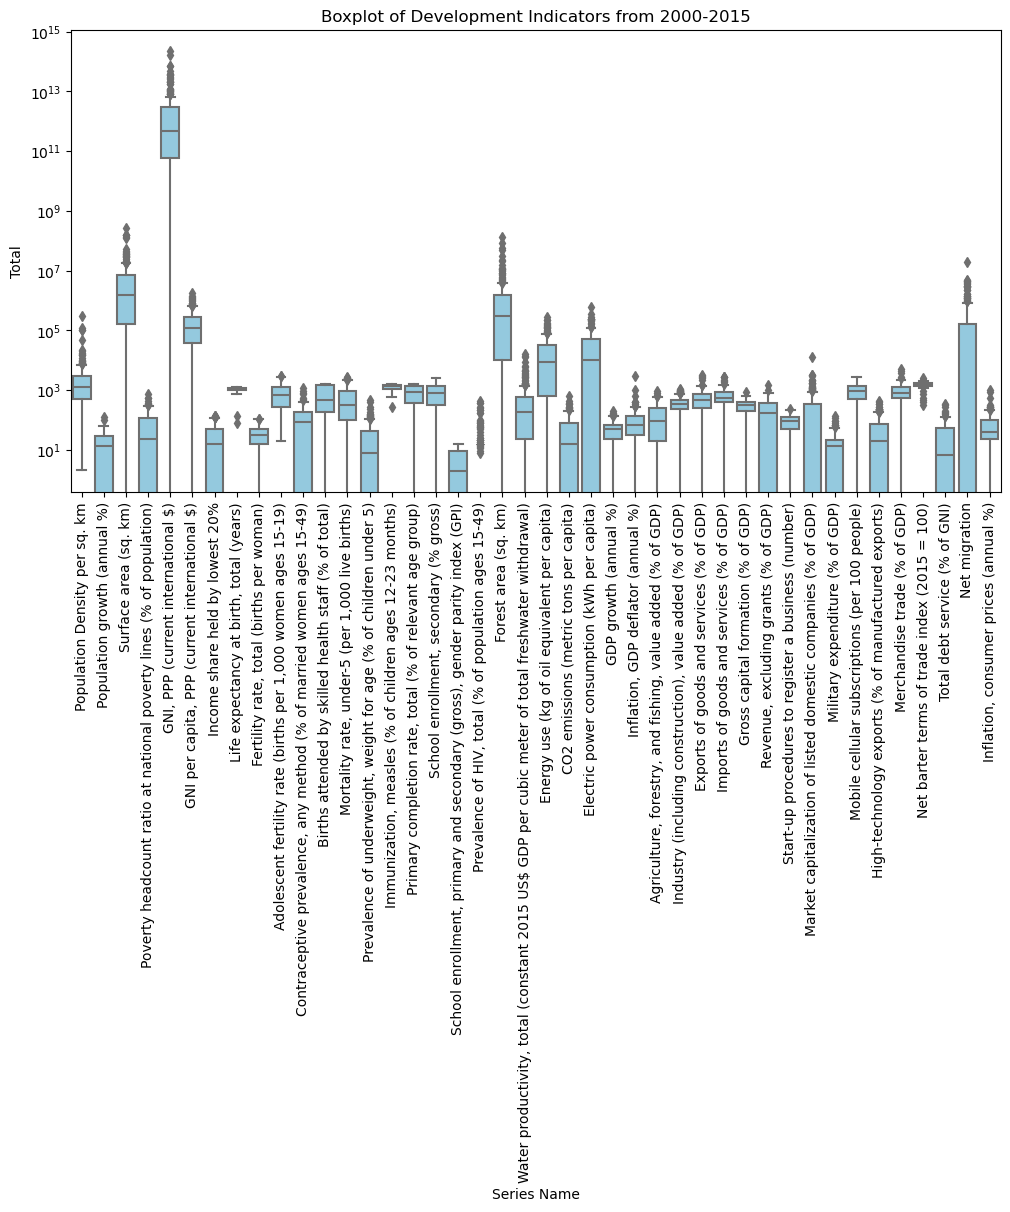

In [880]:
#Groupby 'Series Name', 'Country Name', 'Country Code' to Plot filterd data using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Series Name', y='Total', color='skyblue')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Boxplot of Development Indicators from 2000-2015')
plt.ylabel('Total')
plt.show()



In [881]:
#Groupby 'Series Name', 'Country Name', 'Country Code' to create a pivot table with Total as values
pivot_table = filtered_df.pivot_table(index=['Series Name', 'Country Name', 'Country Code'], values='Total')
pivot_table.head()

#Reset index of the pivot table
pivot_table = pivot_table.reset_index()
pivot_table.head()

#Check the shape of the pivot table
pivot_table.shape

#Check the top 10 rows with the highest Total
pivot_table.nlargest(10, 'Total')








Series Name              Country Name  \
6398       Population Density per sq. km                    Kosovo   
6471       Population Density per sq. km               South Sudan   
6476       Population Density per sq. km  St. Martin (French part)   
2810  GNI, PPP (current international $)             United States   
2645  GNI, PPP (current international $)                     China   
2702  GNI, PPP (current international $)                     Japan   
2693  GNI, PPP (current international $)                     India   
2677  GNI, PPP (current international $)                   Germany   
2765  GNI, PPP (current international $)        Russian Federation   
2630  GNI, PPP (current international $)                    Brazil   

     Country Code         Total  
6398          XKX           inf  
6471          SSD           inf  
6476          MAF           inf  
2810          USA  2.285518e+14  
2645          CHN  1.602824e+14  
2702          JPN  7.109099e+13  
2693          IND  7.024601e+13  
2677          DEU  4.861730e+13  
2765          RUS  3.750002e+13  
2630          BRA  3.747905e+13

In [882]:
#Groupby 'Series Name', 'Country Name', 'Country Code' to create a pivot table with Total as values
pivot_table = filtered_df.pivot_table(index=['Series Name', 'Country Name', 'Country Code'], values='Total')
pivot_table.head()

#Reset index of the pivot table
pivot_table = pivot_table.reset_index()
pivot_table.head()

#Check the shape of the pivot table
pivot_table.shape

#Check the top 10 rows with the lowest Total
pivot_table.nsmallest(10, 'Total')

Series Name          Country Name Country Code       Total
6225  Net migration              Pakistan          PAK -12428793.0
6091  Net migration            Bangladesh          BGD  -8956345.0
6165  Net migration                 India          IND  -6480399.0
6117  Net migration                 China          CHN  -5730497.0
6265  Net migration  Syrian Arab Republic          SYR  -4695217.0
6214  Net migration                 Nepal          NPL  -4157959.0
6203  Net migration                Mexico          MEX  -3552475.0
6231  Net migration           Philippines          PHL  -2864989.0
6230  Net migration                  Peru          PER  -2491851.0
6211  Net migration               Myanmar          MMR  -2112554.0

In [883]:
#Groupby 'Series Name', 'Country Name', 'Country Code' to create a variable of all unique values of Series Name
dev_indicators = filtered_df.groupby(['Series Name', 'Country Name', 'Country Code'])['Total'].sum().index.get_level_values('Series Name').unique()
dev_indicators







Index(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Births attended by skilled health staff (% of total)',
       'CO2 emissions (metric tons per capita)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)', 'Forest area (sq. km)',
       'GDP growth (annual %)',
       'GNI per capita, PPP (current international $)',
       'GNI, PPP (current international $)',
       'Gross capital formation (% of GDP)',
       'High-technology exports (% of manufactured exports)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Imports of goods and services (% of GDP)',
       'Income share held by lowest 20%',
       'Industry (including constr

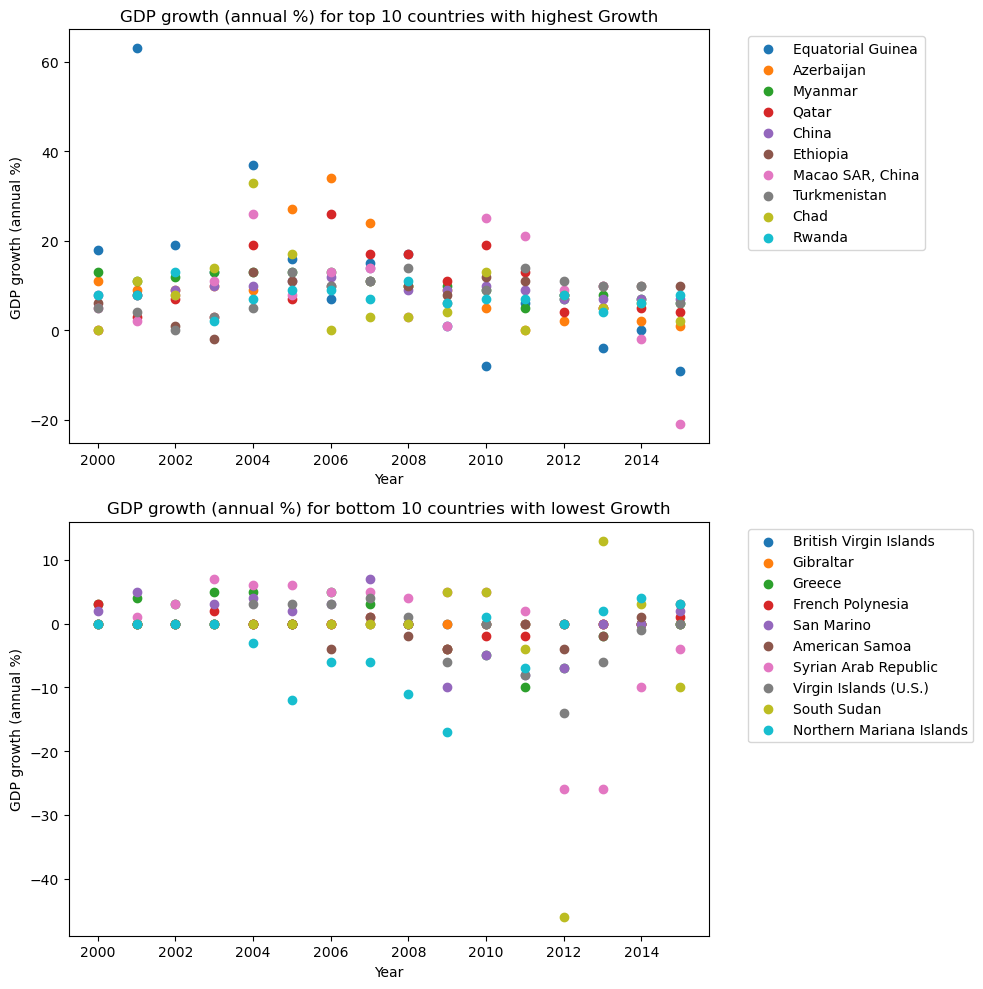

In [884]:


# Filter the DataFrame
df_gdp_growth = df[df['Series Name'] == 'GDP growth (annual %)']

# Sort by 'Total'
df_gdp_growth = df_gdp_growth.sort_values('Total', ascending=False)

# Select top 10 countries
df_gdp_growth_top10 = df_gdp_growth.head(10)

# Select bottom 10 countries
df_gdp_growth_bottom10 = df_gdp_growth.tail(10)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Create a scatter plot for each country in top 10
for index, row in df_gdp_growth_top10.iterrows():
    country = row['Country Name']
    axs[0].scatter(range(2000, 2016), [row[str(year)] for year in range(2000, 2016)], label=country)

axs[0].set_title('GDP growth (annual %) for top 10 countries with highest Growth')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP growth (annual %)')
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a scatter plot for each country in bottom 10
for index, row in df_gdp_growth_bottom10.iterrows():
    country = row['Country Name']
    axs[1].scatter(range(2000, 2016), [row[str(year)] for year in range(2000, 2016)], label=country)

axs[1].set_title('GDP growth (annual %) for bottom 10 countries with lowest Growth')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP growth (annual %)')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

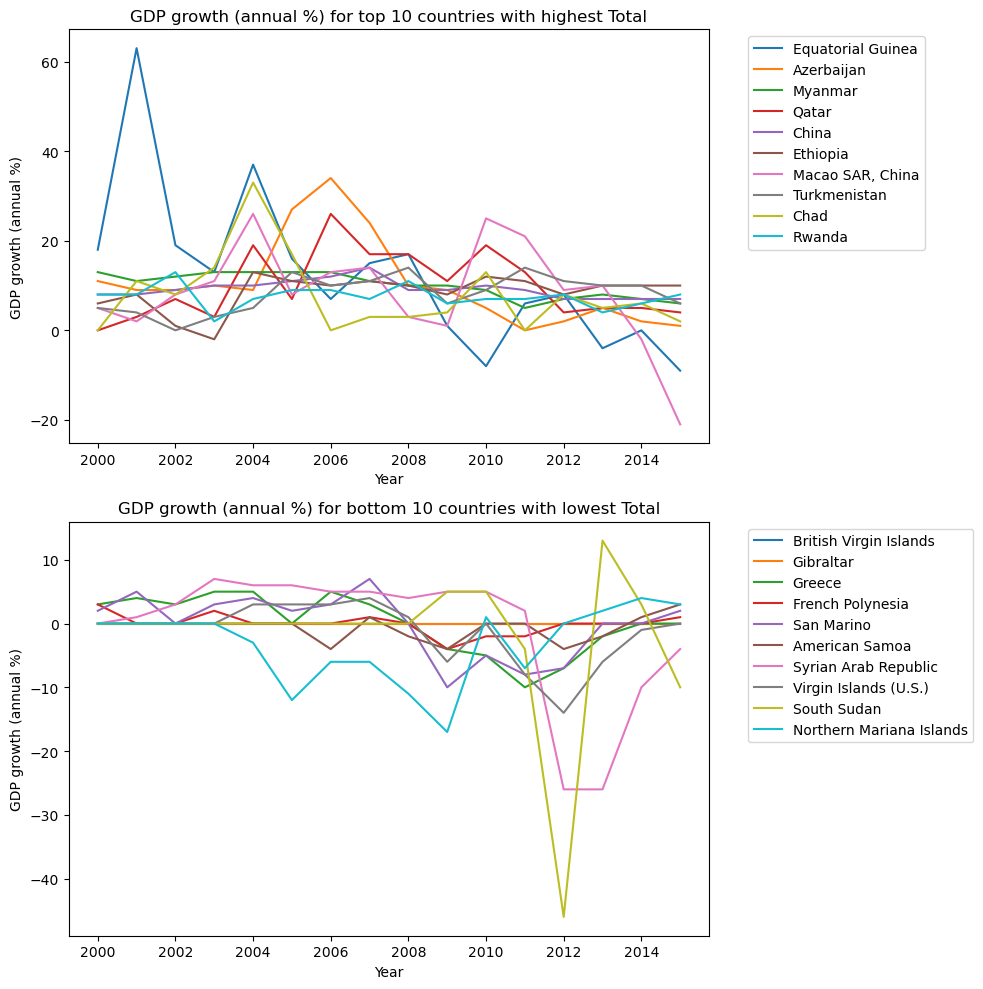

In [885]:
#Time series GDP growth (annual %) for top and bottom 10 countries


fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Create a time series plot for each country in top 10
for index, row in df_gdp_growth_top10.iterrows():
    country = row['Country Name']
    axs[0].plot(range(2000, 2016), [row[str(year)] for year in range(2000, 2016)], label=country)

axs[0].set_title('GDP growth (annual %) for top 10 countries with highest Total')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP growth (annual %)')
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a time series plot for each country in bottom 10
for index, row in df_gdp_growth_bottom10.iterrows():
    country = row['Country Name']
    axs[1].plot(range(2000, 2016), [row[str(year)] for year in range(2000, 2016)], label=country)

axs[1].set_title('GDP growth (annual %) for bottom 10 countries with lowest Total')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP growth (annual %)')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

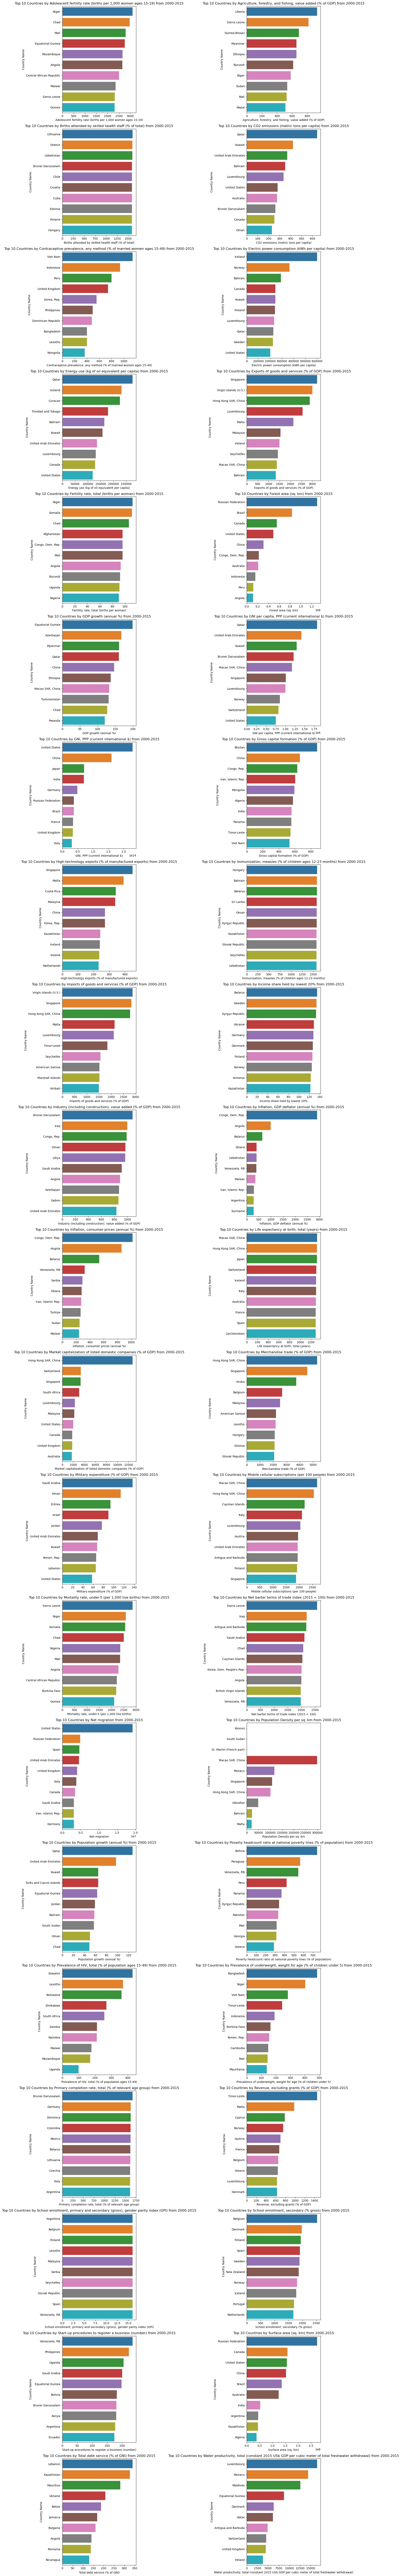

The country with the most development indicators is: Luxembourg


In [886]:
import statistics

# Top development indicators for top 10 countries in from 2000-2015



# Check if dev_indicators is empty
if len(dev_indicators) == 0:
    print("No development indicators found.")
else:
    # Initialize figure and axes
    fig, axes = plt.subplots(nrows=21, ncols=2, figsize=(15, 6*21))

    # Create a list to store the countries
    countries = []

    # Create bar plots for each indicator
    for i, indicator in enumerate(dev_indicators):
        # Filter the DataFrame for the current indicator
        df_indicator = filtered_df[filtered_df['Series Name'] == indicator]
        
        # Select the most recent year (2015)
        top_10_countries = df_indicator[['Country Name', 'Total']].nlargest(10, 'Total')
        
        # Add the countries to the list
        countries.extend(top_10_countries['Country Name'].tolist())
        
        # Plot the top 10 countries for the indicator
        row = i // 2
        col = i % 2
        sns.barplot(x='Total', y='Country Name', data=top_10_countries, ax=axes[row, col])
        axes[row, col].set_title(f'Top 10 Countries by {indicator} from 2000-2015')
        axes[row, col].set_xlabel(indicator)
        axes[row, col].set_ylabel('Country Name')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(wspace=1.5)  # Increase the space between columns
    plt.show()

    # Find the mode of the countries
    mode_country = statistics.mode(countries)
    print(f"The country with the most development indicators is: {mode_country}")

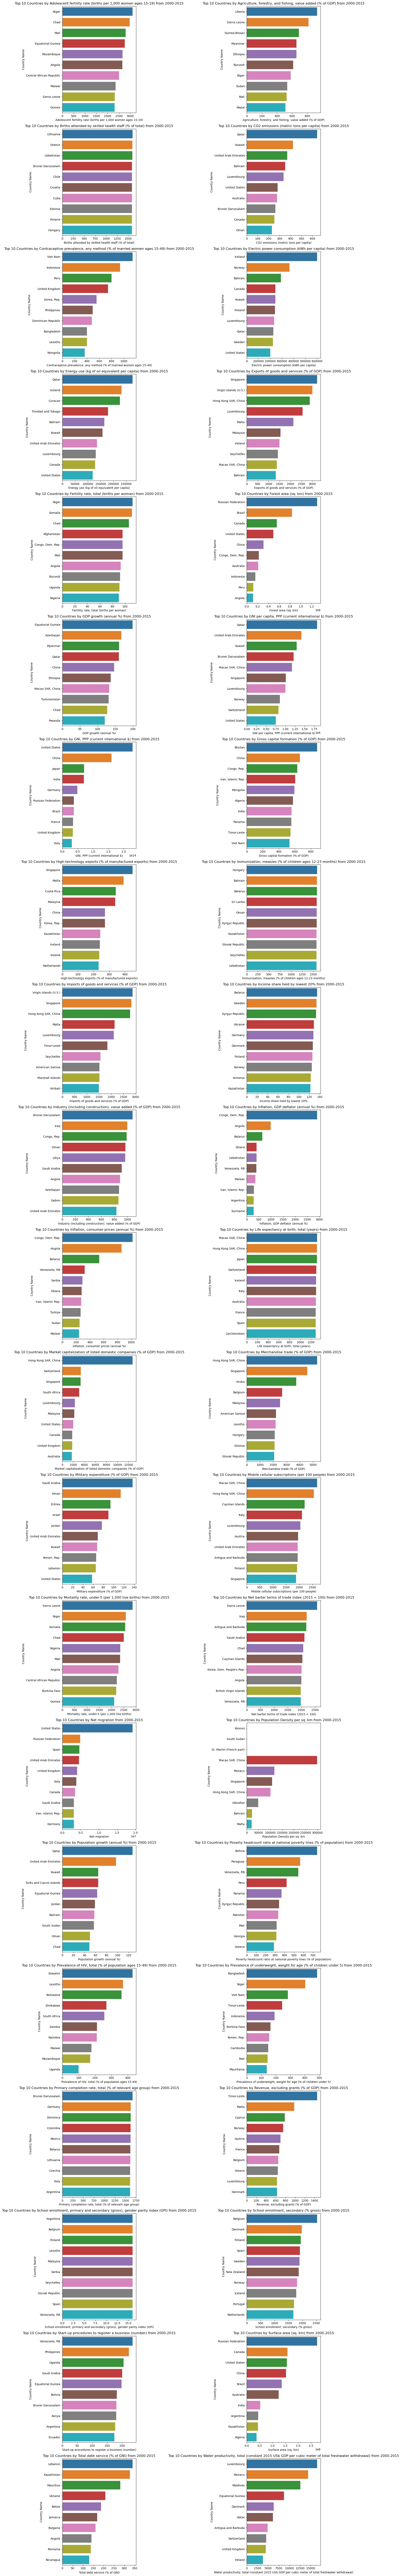

In [819]:
# Top development indicators for top 10 countries in from 2000-2015

# Define dev_indicators
dev_indicators = filtered_df.groupby(['Series Name', 'Country Name', 'Country Code'])['Total'].sum().index.get_level_values('Series Name').unique()

# Check if dev_indicators is empty
if len(dev_indicators) == 0:
    print("No development indicators found.")
else:
    # Initialize figure and axes
    fig, axes = plt.subplots(nrows=21, ncols=2, figsize=(15, 6*21))

    # Create bar plots for each indicator
    for i, indicator in enumerate(dev_indicators):
        # Filter the DataFrame for the current indicator
        df_indicator = filtered_df[filtered_df['Series Name'] == indicator]
        
        # Select the most recent year (2015)
        top_10_countries = df_indicator[['Country Name', 'Total']].nlargest(10, 'Total')
        
        # Plot the top 10 countries for the indicator
        row = i // 2
        col = i % 2
        sns.barplot(x='Total', y='Country Name', data=top_10_countries, ax=axes[row, col])
        axes[row, col].set_title(f'Top 10 Countries by {indicator} from 2000-2015')
        axes[row, col].set_xlabel(indicator)
        axes[row, col].set_ylabel('Country Name')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(wspace=1.5)  # Increase the space between columns
    plt.show()

In [820]:


# Define dev_indicators
dev_indicators = filtered_df.groupby(['Series Name', 'Country Name', 'Country Code'])['Total'].sum().index.get_level_values('Series Name').unique()

# Check if dev_indicators is empty
if len(dev_indicators) == 0:
    print("No development indicators found.")
else:
    # Create a map for each indicator
    for i, indicator in enumerate(dev_indicators):
        # Filter the DataFrame for the current indicator
        df_indicator = filtered_df[filtered_df['Series Name'] == indicator]
        
        # Create a choropleth map
        fig = px.choropleth(df_indicator, locations='Country Code',
                            color='Total', # column to use for color
                            hover_name='Country Name', # column to add to hover information
                            hover_data=['Series Name', 'Total'], # additional data to show on hover
                            color_continuous_scale=px.colors.sequential.Plasma,
                            title=f'{indicator} from 2000-2015')
        
        # Show the plot
        fig.show()

In [821]:
import plotly.express as px

# Define dev_indicators
dev_indicators = filtered_df.groupby(['Series Name', 'Country Name', 'Country Code'])['Total'].sum().index.get_level_values('Series Name').unique()

# Check if dev_indicators is empty
if len(dev_indicators) == 0:
    print("No development indicators found.")
else:
    # Create a boxplot for each indicator
    for i, indicator in enumerate(dev_indicators):
        # Filter the DataFrame for the current indicator
        df_indicator = filtered_df[filtered_df['Series Name'] == indicator]
        
        # Create a boxplot
        fig = px.box(df_indicator, y='Total',
                     labels={'Total': f'Total {indicator}'}, # rename the y-axis label
                     title=f'Boxplot of {indicator} from 2000-2015')
        
        # Show the plot
        fig.show()

In [601]:
filtered_df.columns

Index(['Series Name', 'Country Name', 'Country Code', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', 'Total'],
      dtype='object')

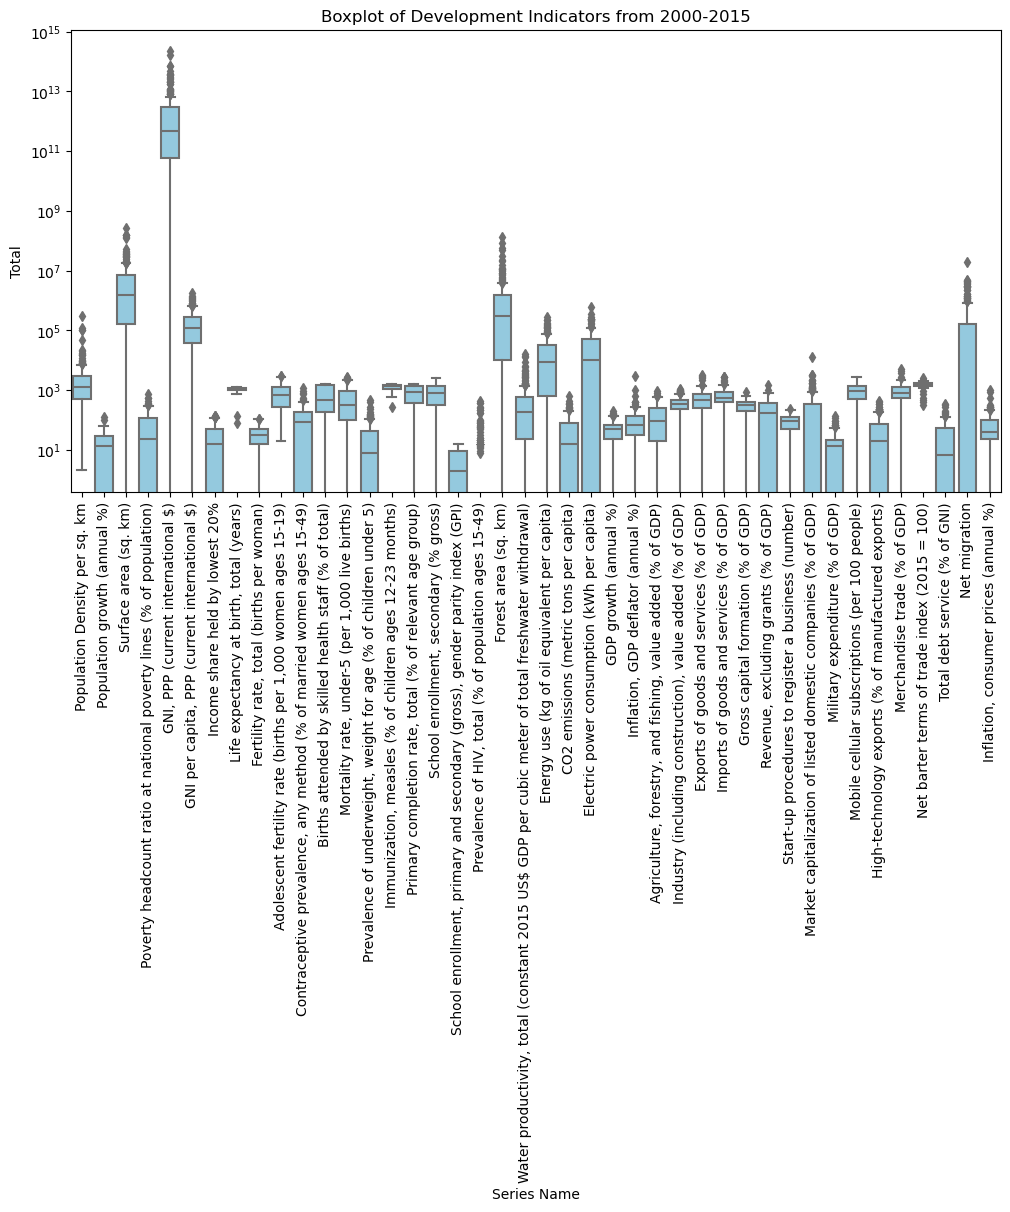

In [822]:
#Groupby 'Series Name', 'Country Name', 'Country Code' to Plot filterd data using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Series Name', y='Total', color='skyblue')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Boxplot of Development Indicators from 2000-2015')
plt.ylabel('Total')
plt.show()



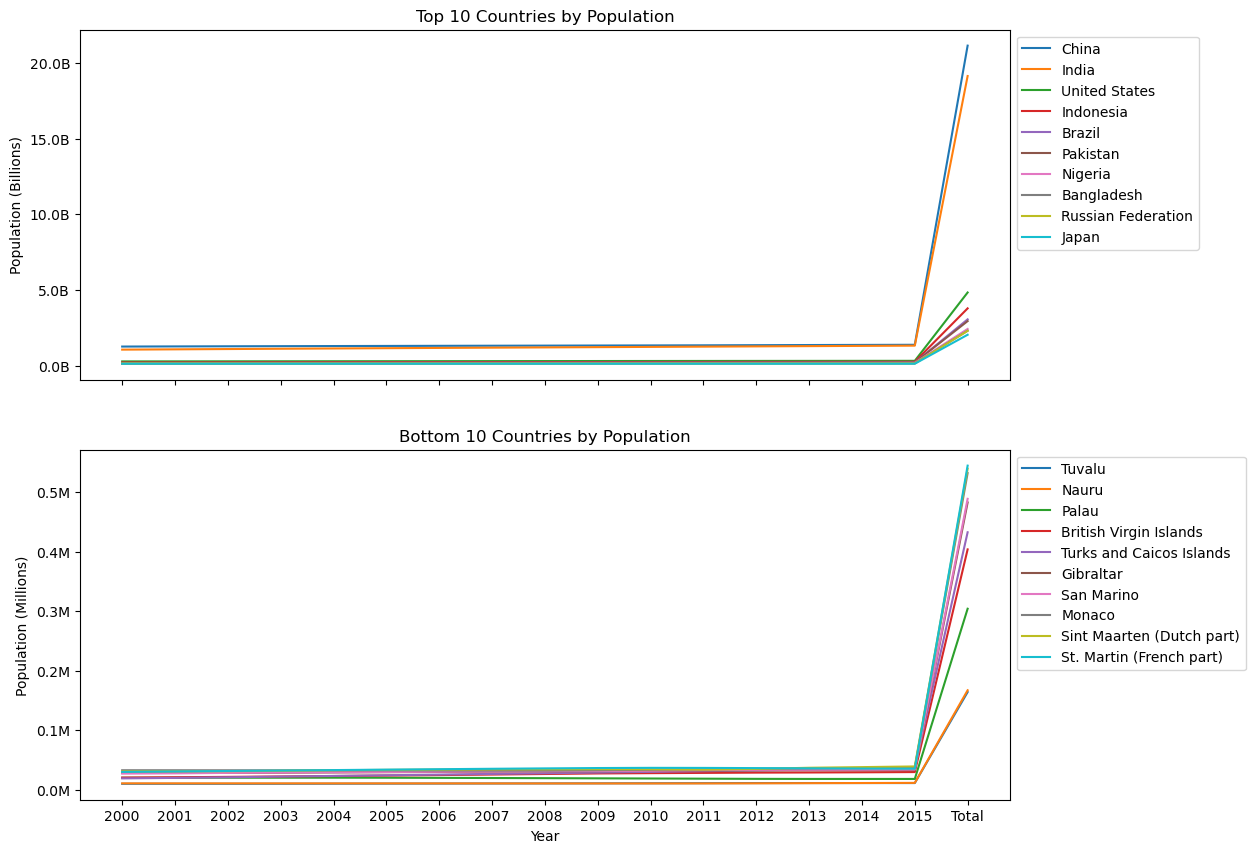

In [826]:


#Select rows with Series Name = 'Population, total'
df_population = df[df['Series Name'] == 'Population, total']
df_population.set_index('Country Name', inplace=True)
df_population = df_population.iloc[:, 2:]  # Selecting only the year columns

# Get top 10 and bottom 10 by the last year
top_10 = df_population.iloc[:, -1].nlargest(10).index
bottom_10 = df_population.iloc[:, -1].nsmallest(10).index

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Formatter to display y-axis values in millions
formatter_millions = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x*1e-6) + 'M')

for country in top_10:
    axs[0].plot(df_population.columns, df_population.loc[country], label=country)
axs[0].set_title('Top 10 Countries by Population')
axs[0].legend(loc='upper left', bbox_to_anchor=(1,1))
axs[0].yaxis.set_major_formatter(formatter)  # Use the formatter for the y-axis
axs[0].set_ylabel('Population (Billions)')

for country in bottom_10:
    axs[1].plot(df_population.columns, df_population.loc[country], label=country)
axs[1].set_title('Bottom 10 Countries by Population')
axs[1].legend(loc='upper left', bbox_to_anchor=(1,1))
axs[1].yaxis.set_major_formatter(formatter_millions)  # Use the formatter for the y-axis
axs[1].set_ylabel('Population (Millions)')

plt.xlabel('Year')
plt.show()

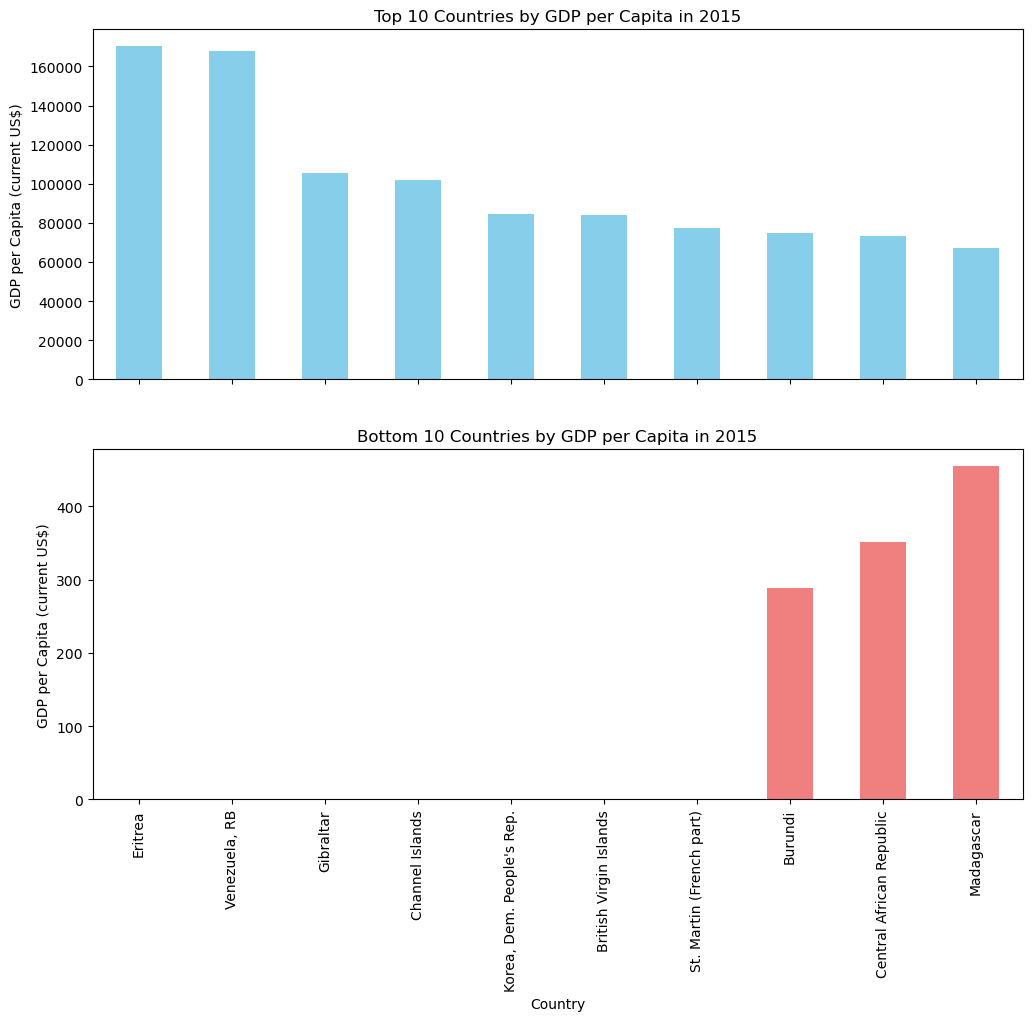

In [829]:
# Select rows with Series Name = 'GDP per capita (current US$)'
df_gdp_per_capita = df[df['Series Name'] == 'GDP per capita (current US$)']
df_gdp_per_capita.set_index('Country Name', inplace=True)

# Get top 10 and bottom 10 by the specified year
top_10 = df_gdp_per_capita[year].nlargest(10)
bottom_10 = df_gdp_per_capita[year].sort_values(ascending=True).head(10)

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot top 10
top_10.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title(f'Top 10 Countries by GDP per Capita in {year}')
axs[0].set_ylabel('GDP per Capita (current US$)')

# Plot bottom 10
bottom_10.plot(kind='bar', ax=axs[1], color='lightcoral')
axs[1].set_title(f'Bottom 10 Countries by GDP per Capita in {year}')
axs[1].set_ylabel('GDP per Capita (current US$)')
axs[1].set_xlabel('Country')

plt.show()

/var/folders/8l/8rdghy394hsfcdgcvnznlcb40000gn/T/ipykernel_22053/3800809824.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/var/folders/8l/8rdghy394hsfcdgcvnznlcb40000gn/T/ipykernel_22053/3800809824.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



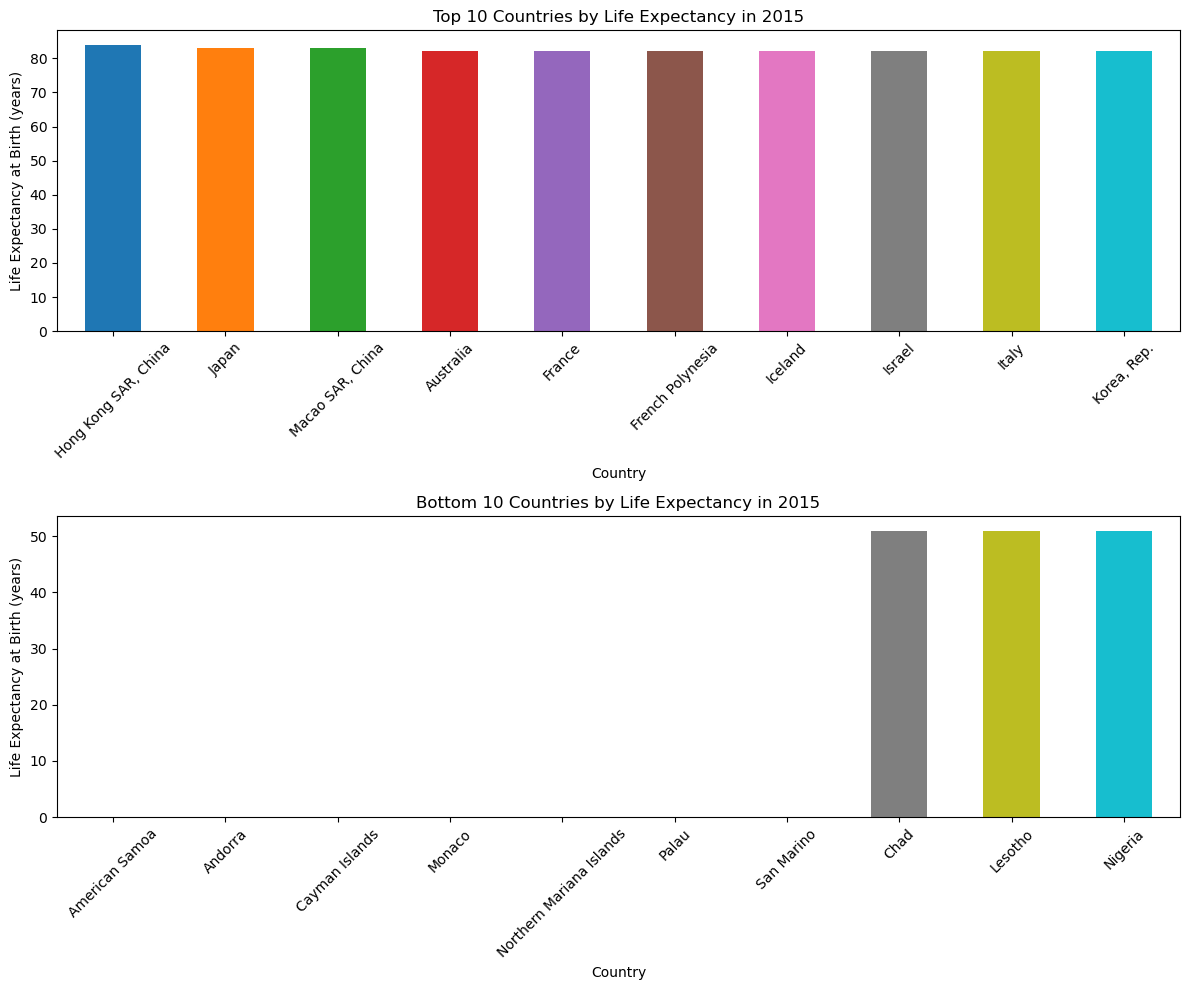

In [830]:
#Top 10 and bottom 10 countries by Life Expectancy at Birth in 2015
year = '2015'
df_life_expectancy = df[df['Series Name'] == 'Life expectancy at birth, total (years)']
df_life_expectancy.set_index('Country Name', inplace=True)

top_10 = df_life_expectancy[year].nlargest(10)
bottom_10 = df_life_expectancy[year].nsmallest(10)

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)  # Set sharex to False

colors = cm.get_cmap('tab10', len(top_10))
top_10.plot(kind='bar', ax=axs[0], color=colors.colors)  # Apply colors to bars
axs[0].set_title(f'Top 10 Countries by Life Expectancy in {year}')
axs[0].set_ylabel('Life Expectancy at Birth (years)')
axs[0].set_xlabel('Country')  # Add x-label to the first subplot
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)  # Rotate x-labels for the first subplot

colors = cm.get_cmap('tab10', len(bottom_10))
bottom_10.plot(kind='bar', ax=axs[1], color=colors.colors)  # Apply colors to bars
axs[1].set_title(f'Bottom 10 Countries by Life Expectancy in {year}')
axs[1].set_ylabel('Life Expectancy at Birth (years)')
axs[1].set_xlabel('Country')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)  # Rotate x-labels for the second subplot

plt.tight_layout()  # Add this line to adjust the layout
plt.show()

/var/folders/8l/8rdghy394hsfcdgcvnznlcb40000gn/T/ipykernel_22053/3231568819.py:10: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/var/folders/8l/8rdghy394hsfcdgcvnznlcb40000gn/T/ipykernel_22053/3231568819.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



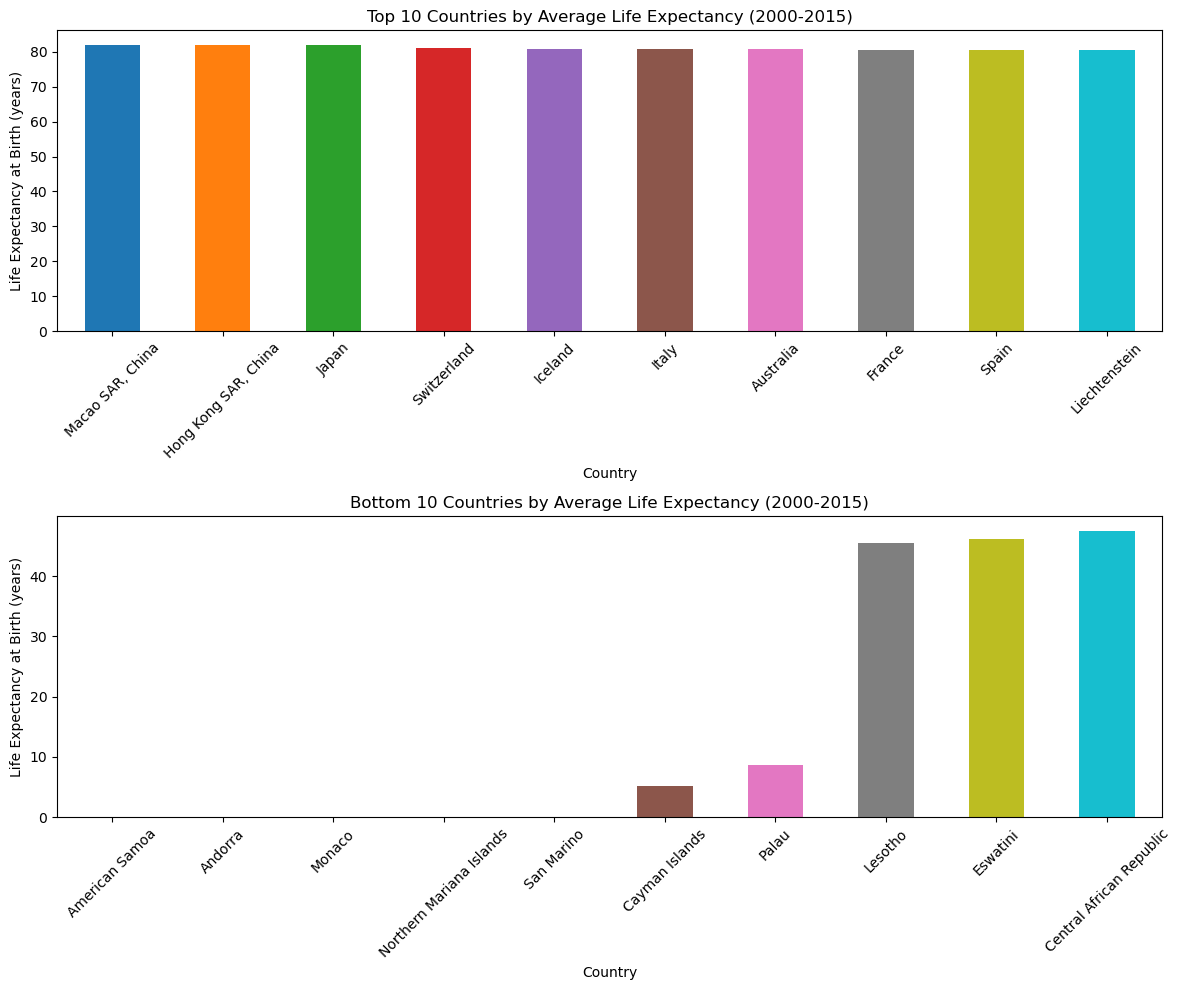

In [831]:
#Top 10 and bottom 10 countries by Life Expectancy at Birth in 2000 to 2015 
df_life_expectancy = df[df['Series Name'] == 'Life expectancy at birth, total (years)']
df_life_expectancy.set_index('Country Name', inplace=True)

top_10 = df_life_expectancy.loc[:, '2000':'2015'].mean(axis=1).nlargest(10)
bottom_10 = df_life_expectancy.loc[:, '2000':'2015'].mean(axis=1).nsmallest(10)

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)  # Set sharex to False

colors = cm.get_cmap('tab10', len(top_10))
top_10.plot(kind='bar', ax=axs[0], color=colors.colors)  # Apply colors to bars
axs[0].set_title('Top 10 Countries by Average Life Expectancy (2000-2015)')
axs[0].set_ylabel('Life Expectancy at Birth (years)')
axs[0].set_xlabel('Country')  # Add x-label to the first subplot
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)  # Rotate x-labels for the first subplot

colors = cm.get_cmap('tab10', len(bottom_10))
bottom_10.plot(kind='bar', ax=axs[1], color=colors.colors)  # Apply colors to bars
axs[1].set_title('Bottom 10 Countries by Average Life Expectancy (2000-2015)')
axs[1].set_ylabel('Life Expectancy at Birth (years)')
axs[1].set_xlabel('Country')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)  # Rotate x-labels for the second subplot

plt.tight_layout()  # Add this line to adjust the layout
plt.show()
